# Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
amazon_data = pd.read_csv('AMZN.csv')

In [3]:
amazon_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [4]:
amazon_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6252,2022-03-18,3136.260010,3231.879883,3120.219971,3225.010010,3225.010010,5141300
6253,2022-03-21,3222.419922,3261.679932,3191.060059,3229.830078,3229.830078,3326900
6254,2022-03-22,3236.110107,3323.340088,3233.979980,3297.780029,3297.780029,3204300
6255,2022-03-23,3274.100098,3327.399902,3253.739990,3268.159912,3268.159912,2790600
6256,2022-03-24,3274.989990,3282.370117,3201.000000,3272.989990,3272.989990,2834900


In [5]:
amazon_data.shape

(6257, 7)

In [6]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6257 entries, 0 to 6256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6257 non-null   object 
 1   Open       6257 non-null   float64
 2   High       6257 non-null   float64
 3   Low        6257 non-null   float64
 4   Close      6257 non-null   float64
 5   Adj Close  6257 non-null   float64
 6   Volume     6257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 342.3+ KB


Let's look to see what the variables represent: 

* Open = Price from the first transaction of a trading day
* High = Maximum price in a trading day
* Low = Minimum price in a trading day
* Close = Price from the last transaction of a trading day
* Adj Close = Closing price adjusted to reflect the value after accounting for   any corporate actions
* Volume = Number of units traded in a day

`date` should be a datetime object. We convert it below.



In [7]:
amazon_data['Date'] = pd.to_datetime(amazon_data['Date'])

In [8]:
amazon_data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [9]:
amazon_data.duplicated().sum()

0

In [10]:
amazon_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
amazon_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6.257000e+03
mean,565.005651,571.345671,558.004657,564.817334,564.817334,7.270525e+06
std,918.112233,928.035683,906.961303,917.488221,917.488221,7.108549e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,39.009998,39.799999,38.360001,39.060001,39.060001,3.536500e+06
50%,105.930000,110.625000,101.500000,103.625000,103.625000,5.424200e+06
75%,596.140015,600.750000,588.299988,593.859985,593.859985,8.242900e+06
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,1.043292e+08


In [12]:
amazon_data.nunique()

Date         6257
Open         5555
High         5505
Low          5510
Close        5644
Adj Close    5644
Volume       6069
dtype: int64

In [13]:
amazon_data = amazon_data.drop(columns=['Adj Close'])

In [14]:
amazon_data.head()

,Date,Open,High,Low,Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,18853200


# Exploratory Data Analysis

## Univariate Analysis

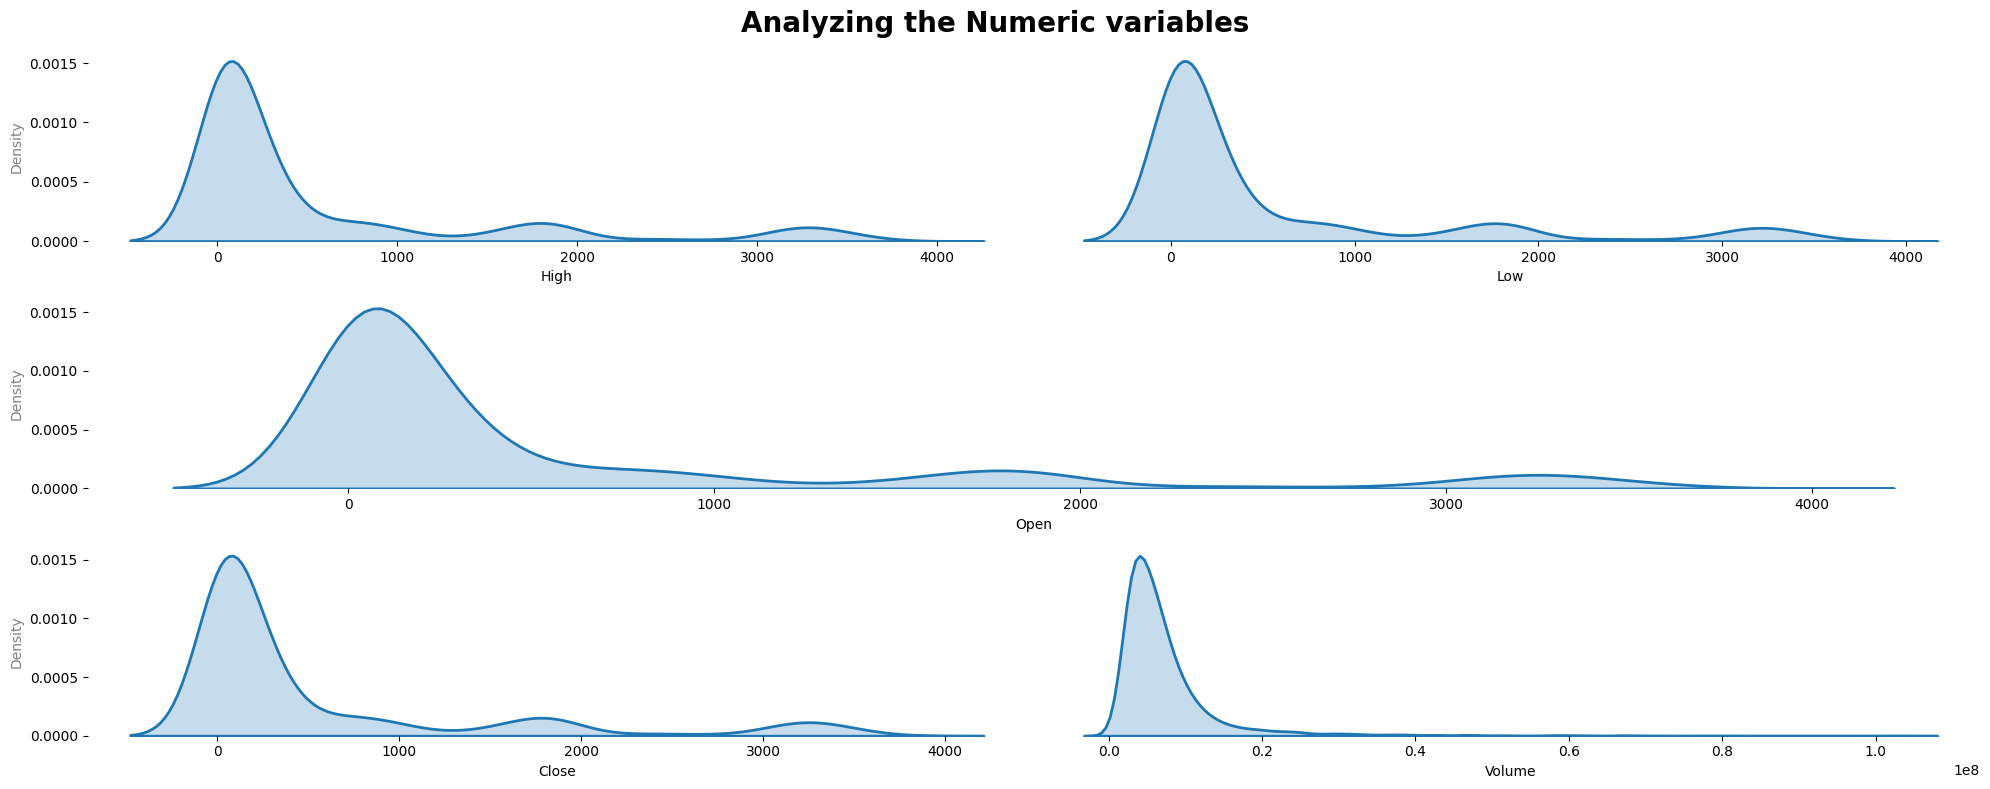

In [15]:
fig=plt.figure(figsize=(20,8), tight_layout=True)
plt.suptitle("Analyzing the Numeric variables", size=20, weight='bold')
ax=fig.subplot_mosaic("""AB
                         CC
                         DE""")
sns.kdeplot(amazon_data['High'], ax=ax['A'], fill=True, linewidth=2)
sns.kdeplot(amazon_data['Low'], ax=ax['B'], fill=True, linewidth=2)
sns.kdeplot(amazon_data['Open'], ax=ax['C'], fill=True, linewidth=2)
sns.kdeplot(amazon_data['Close'], ax=ax['D'], fill=True, linewidth=2)
sns.kdeplot(amazon_data['Volume'], ax=ax['E'], fill=True, linewidth=2)
ax['B'].yaxis.set_visible(False)
ax['E'].yaxis.set_visible(False)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['D'].yaxis.label.set_alpha(0.5)
for s in ['left','right','top','bottom']:
    ax['A'].spines[s].set_visible(False)
    ax['B'].spines[s].set_visible(False)
    ax['C'].spines[s].set_visible(False)
    ax['D'].spines[s].set_visible(False)
    ax['E'].spines[s].set_visible(False)

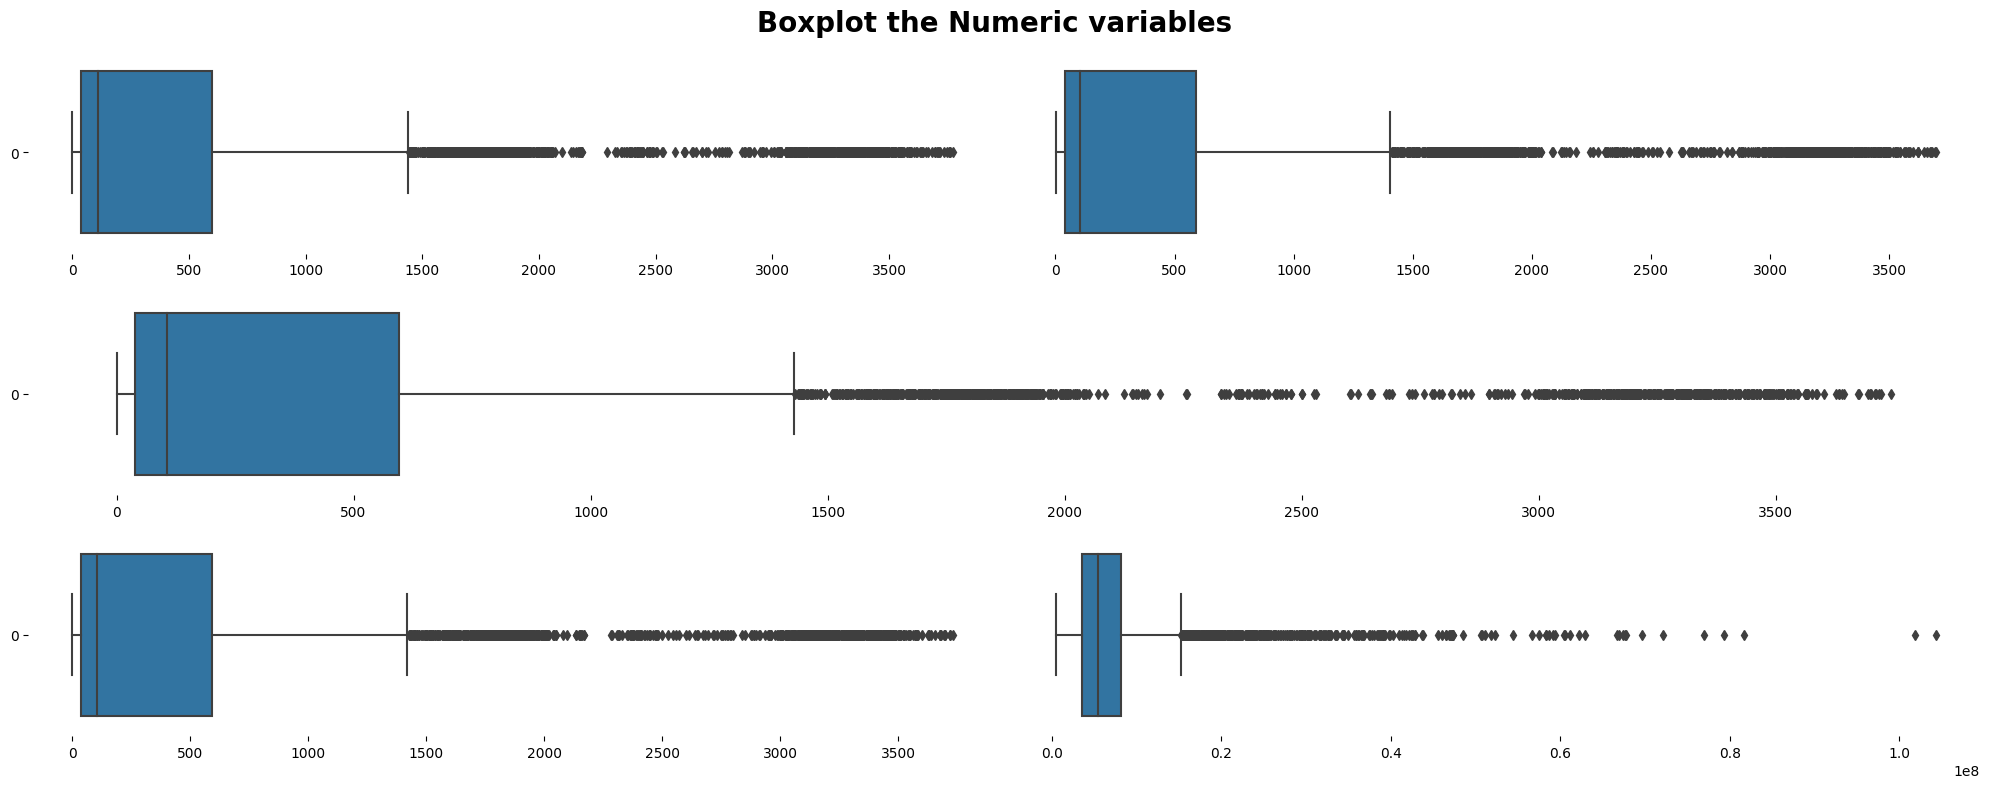

In [37]:
fig=plt.figure(figsize=(20,8), tight_layout=True)
plt.suptitle("Boxplot the Numeric variables", size=20, weight='bold')
ax=fig.subplot_mosaic("""AB
                         CC
                         DE""")
sns.boxplot(amazon_data['High'], orient="h", ax=ax['A'])
sns.boxplot(amazon_data['Low'], orient="h", ax=ax['B'])
sns.boxplot(amazon_data['Open'], orient="h", ax=ax['C'])
sns.boxplot(amazon_data['Close'], orient="h", ax=ax['D'])
sns.boxplot(amazon_data['Volume'], orient="h", ax=ax['E'])
ax['B'].yaxis.set_visible(False)
ax['E'].yaxis.set_visible(False)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['D'].yaxis.label.set_alpha(0.5)
for s in ['left','right','top','bottom']:
    ax['A'].spines[s].set_visible(False)
    ax['B'].spines[s].set_visible(False)
    ax['C'].spines[s].set_visible(False)
    ax['D'].spines[s].set_visible(False)
    ax['E'].spines[s].set_visible(False)

## Multivariate Analysis

### Pairs Plot

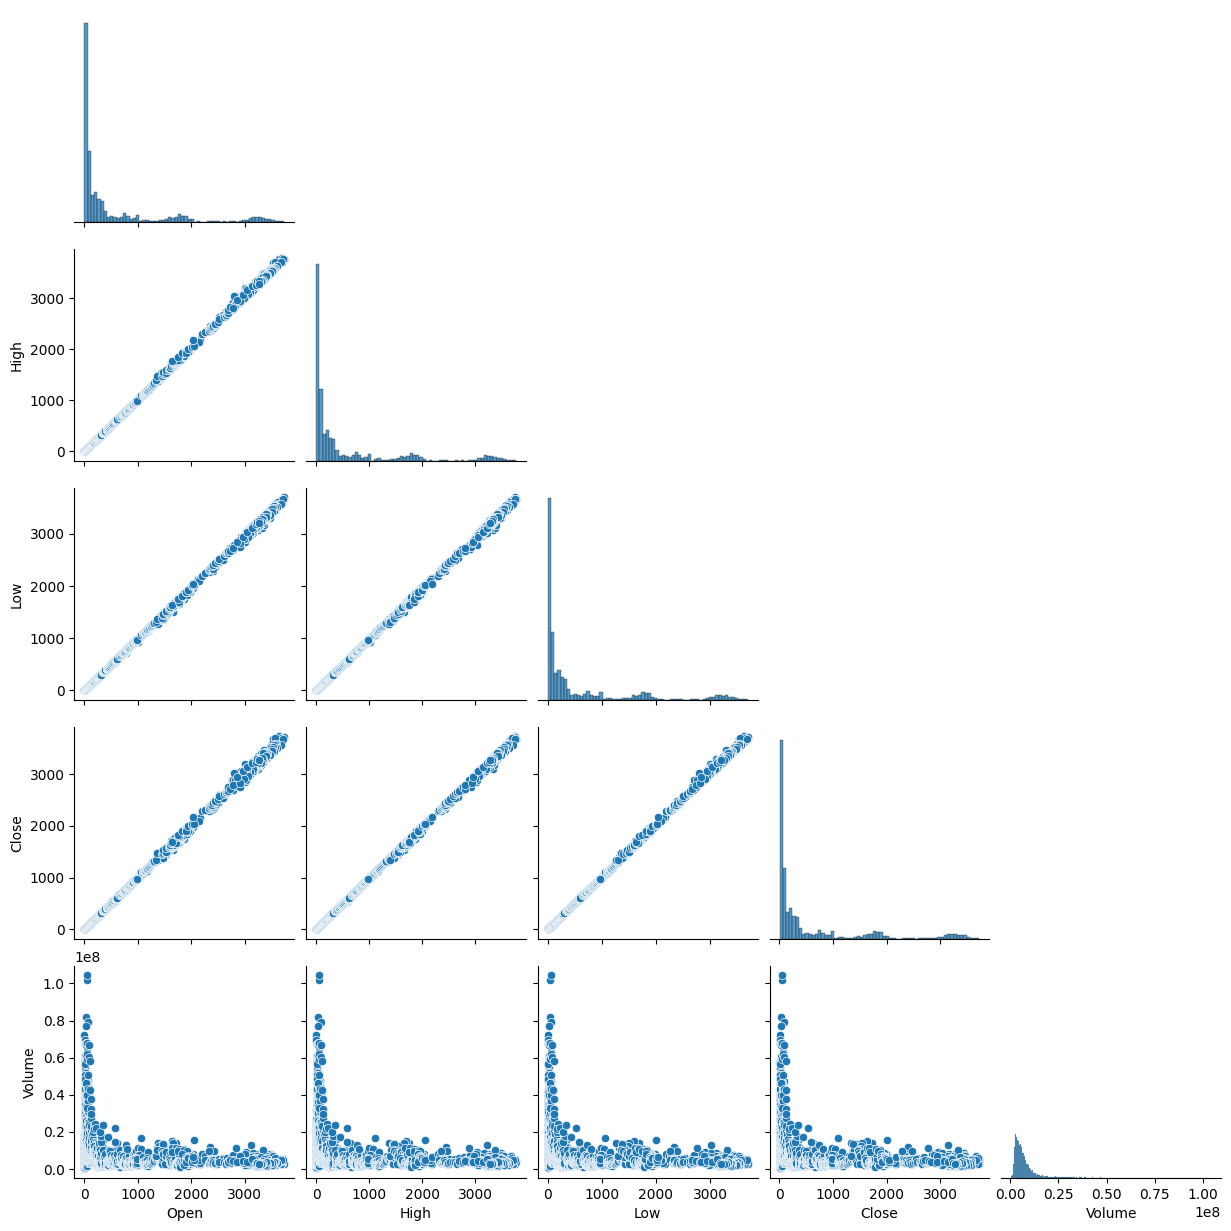

In [17]:
sns.pairplot(amazon_data, corner=True)

### Heat Map

<Axes: >

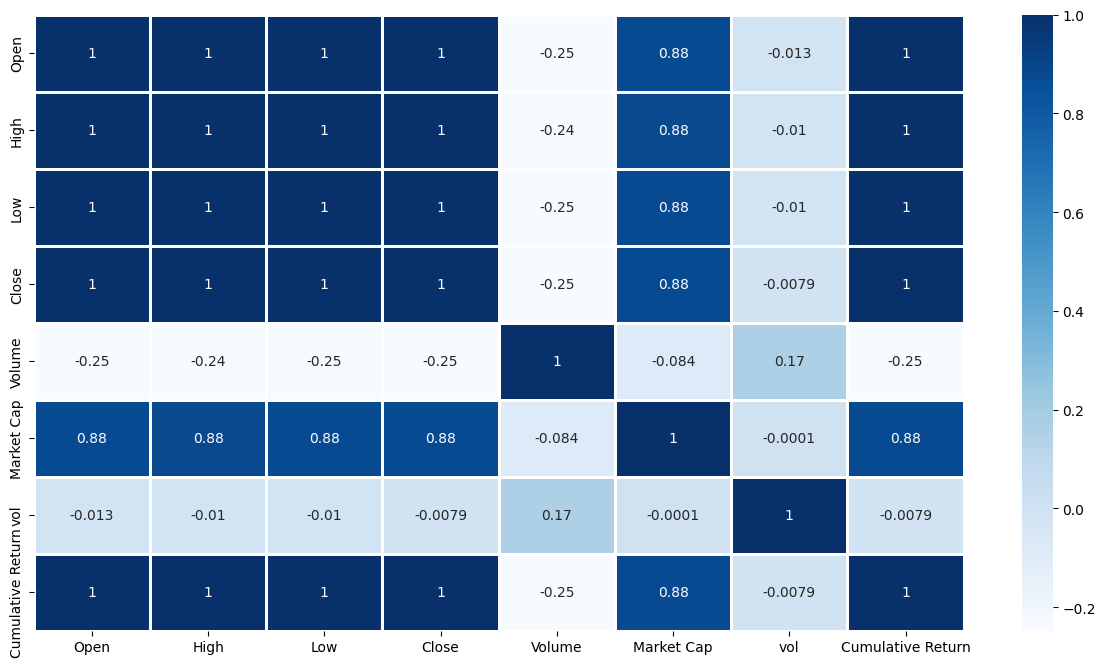

In [44]:
fig=plt.figure(figsize=(15,8))
sns.heatmap(amazon_data.corr(), annot=True, cmap='Blues', linecolor='white', linewidth=2 )

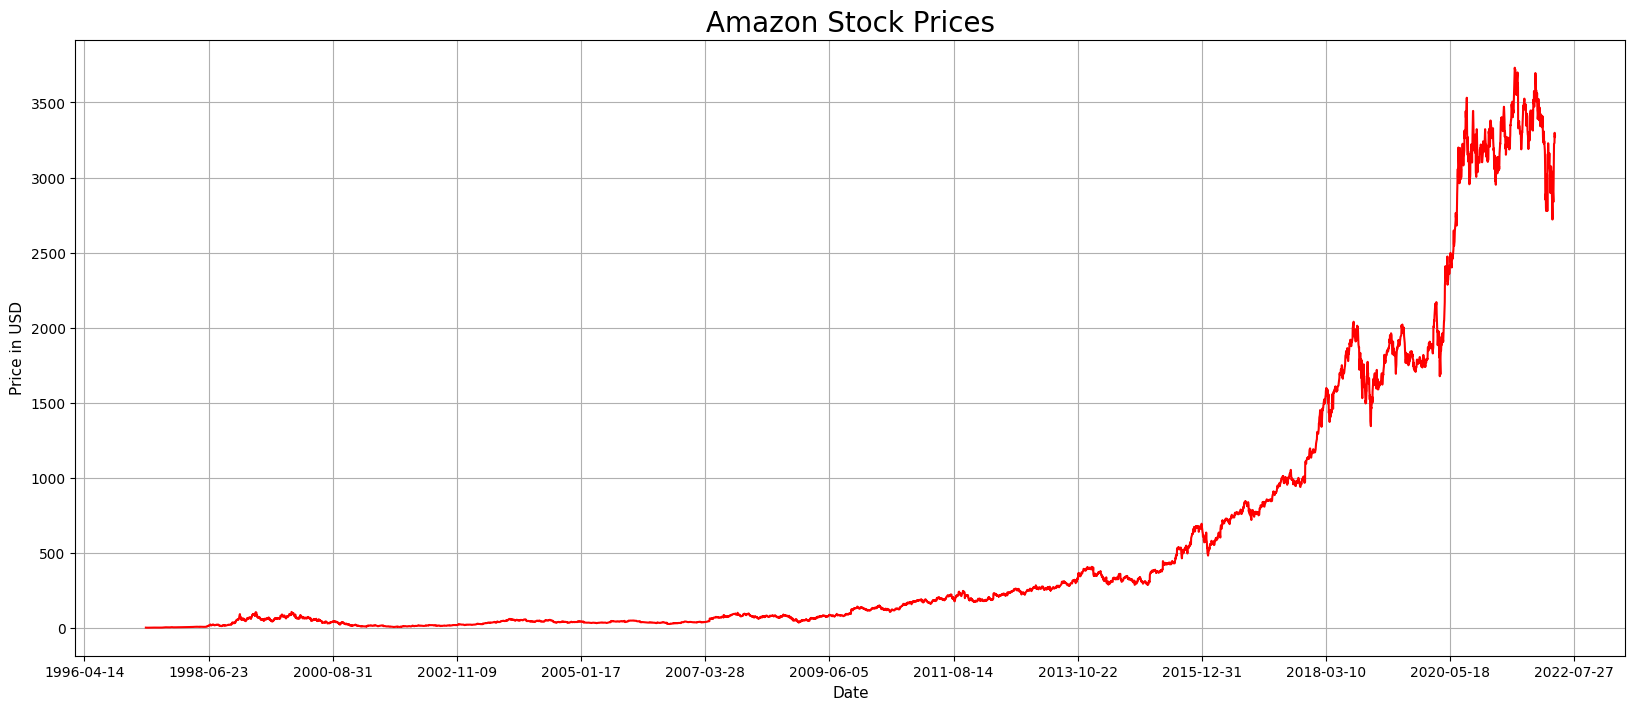

In [20]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(amazon_data['Date'], amazon_data['Close'], color='Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD', fontsize='11')
plt.title('Amazon Stock Prices', fontsize='20')
plt.grid()
plt.show()

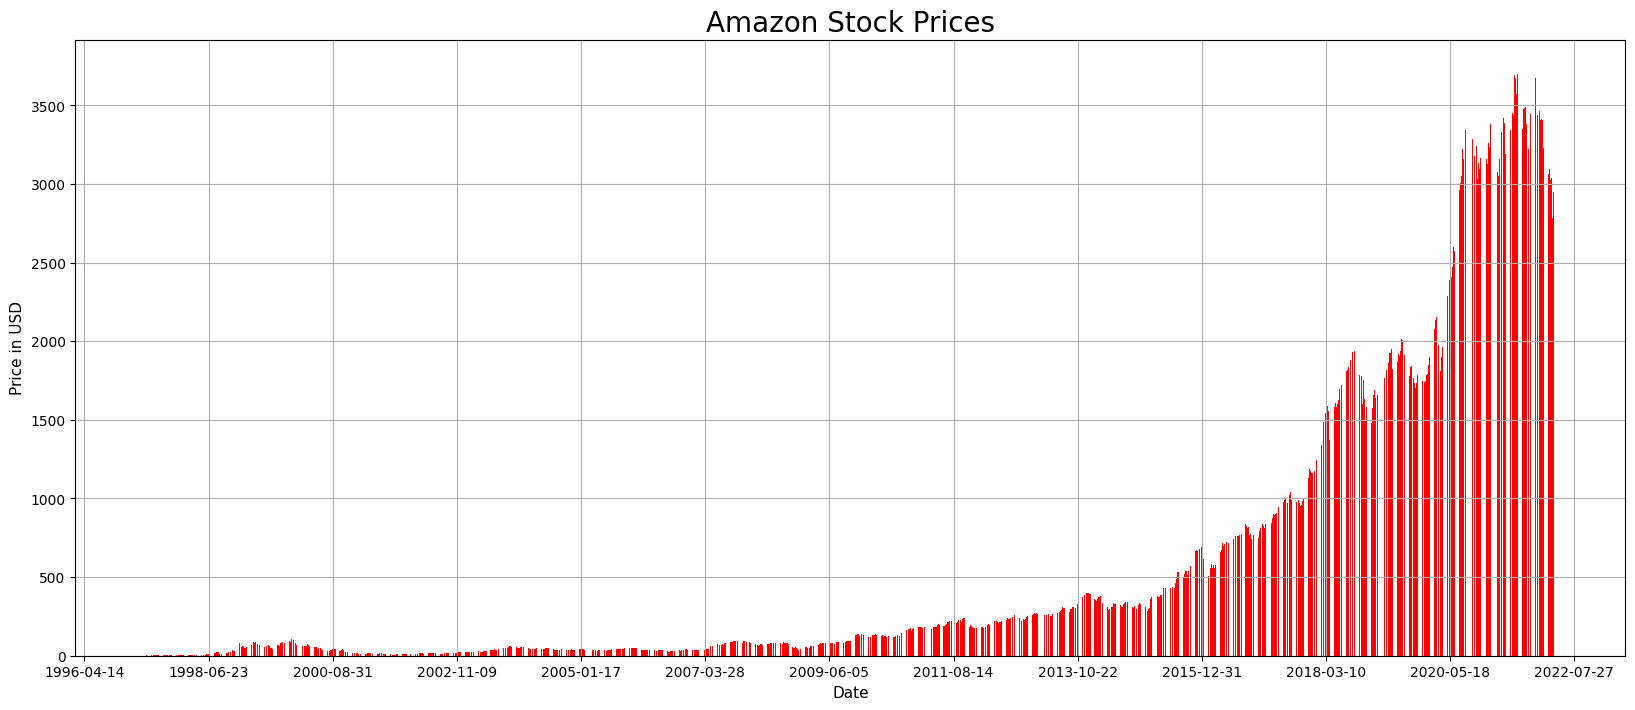

In [21]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(amazon_data['Date'], amazon_data['Close'], color='Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD', fontsize='11')
plt.title('Amazon Stock Prices', fontsize='20')
plt.grid()
plt.show()

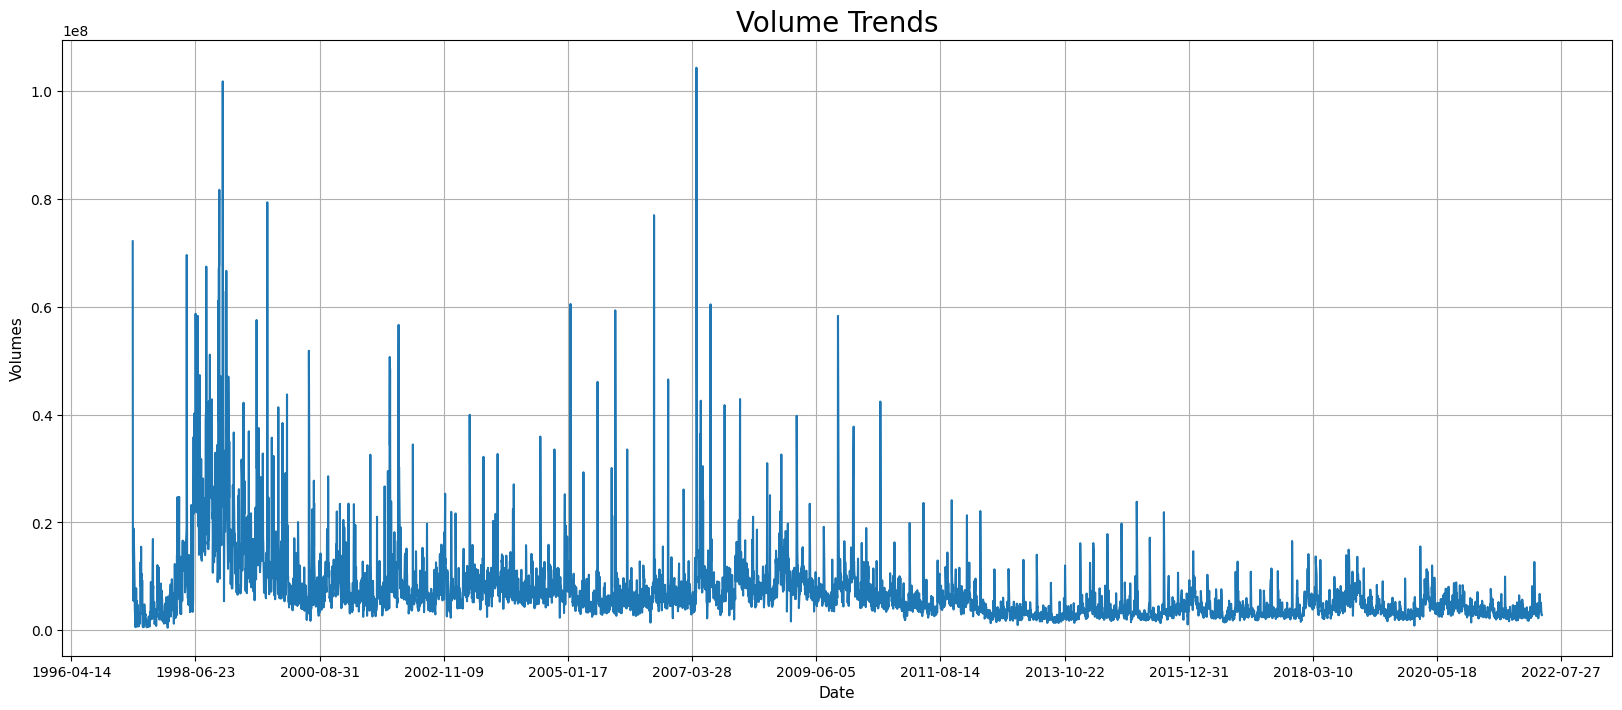

In [22]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(amazon_data['Date'], amazon_data['Volume'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Volumes', fontsize='11')
plt.title('Volume Trends', fontsize=20)
plt.grid()
plt.show()

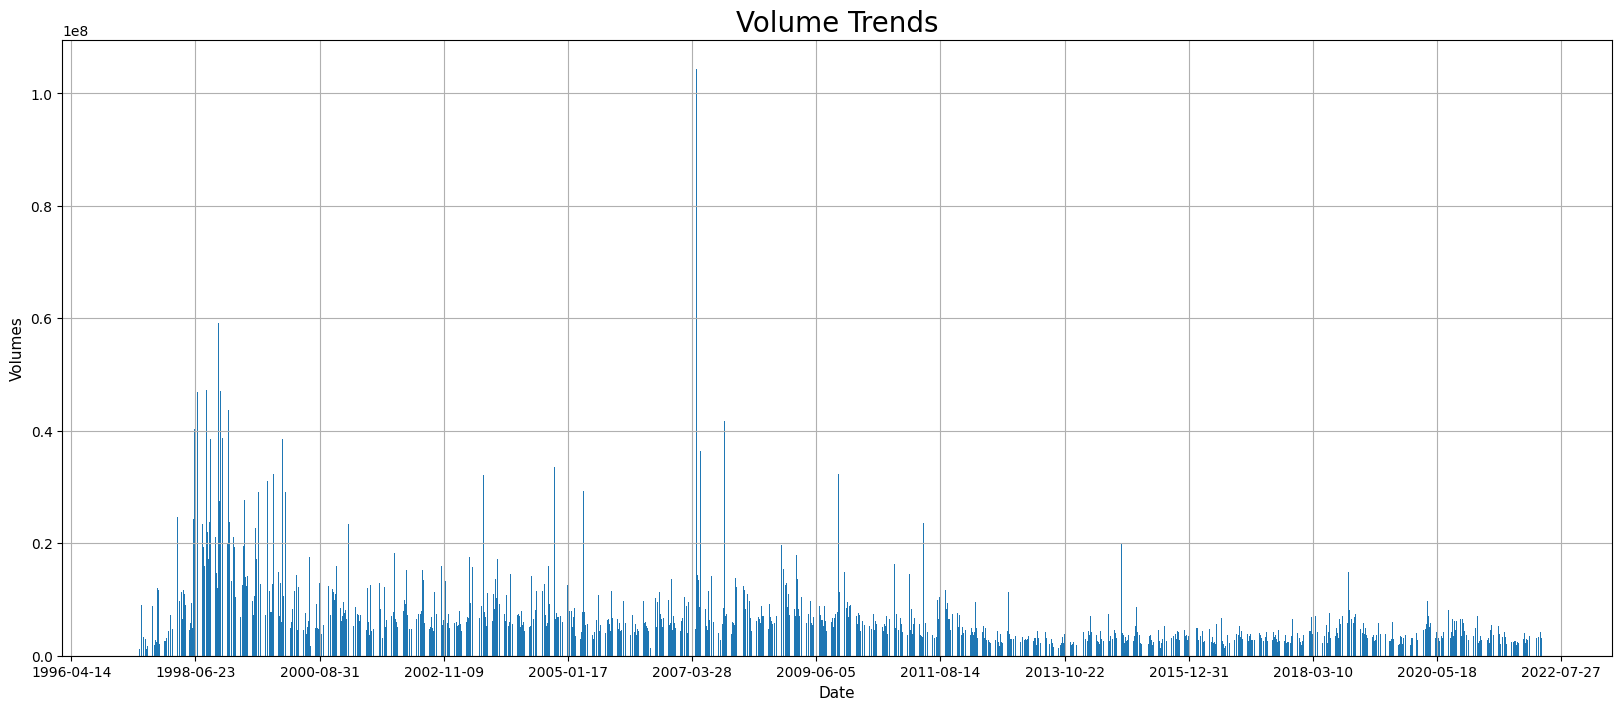

In [23]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(amazon_data['Date'], amazon_data['Volume'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Volumes', fontsize='11')
plt.title('Volume Trends', fontsize=20)
plt.grid()
plt.show()

In [24]:
amazon_data['Market Cap'] = amazon_data['Open'] * amazon_data['Volume']

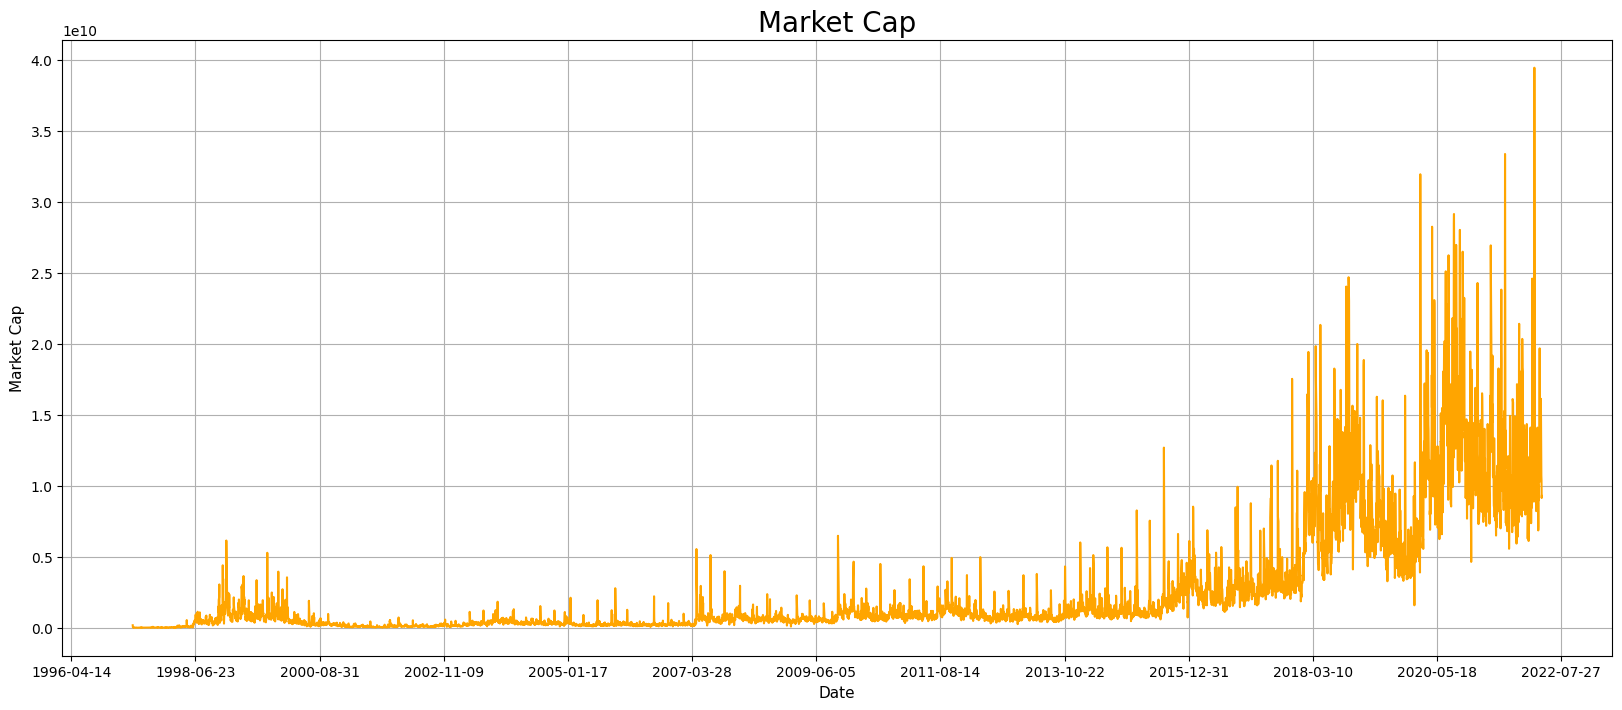

In [25]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(amazon_data['Date'], amazon_data['Market Cap'], color='orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Market Cap', fontsize='11')
plt.title('Market Cap', fontsize=20)
plt.grid()
plt.show()

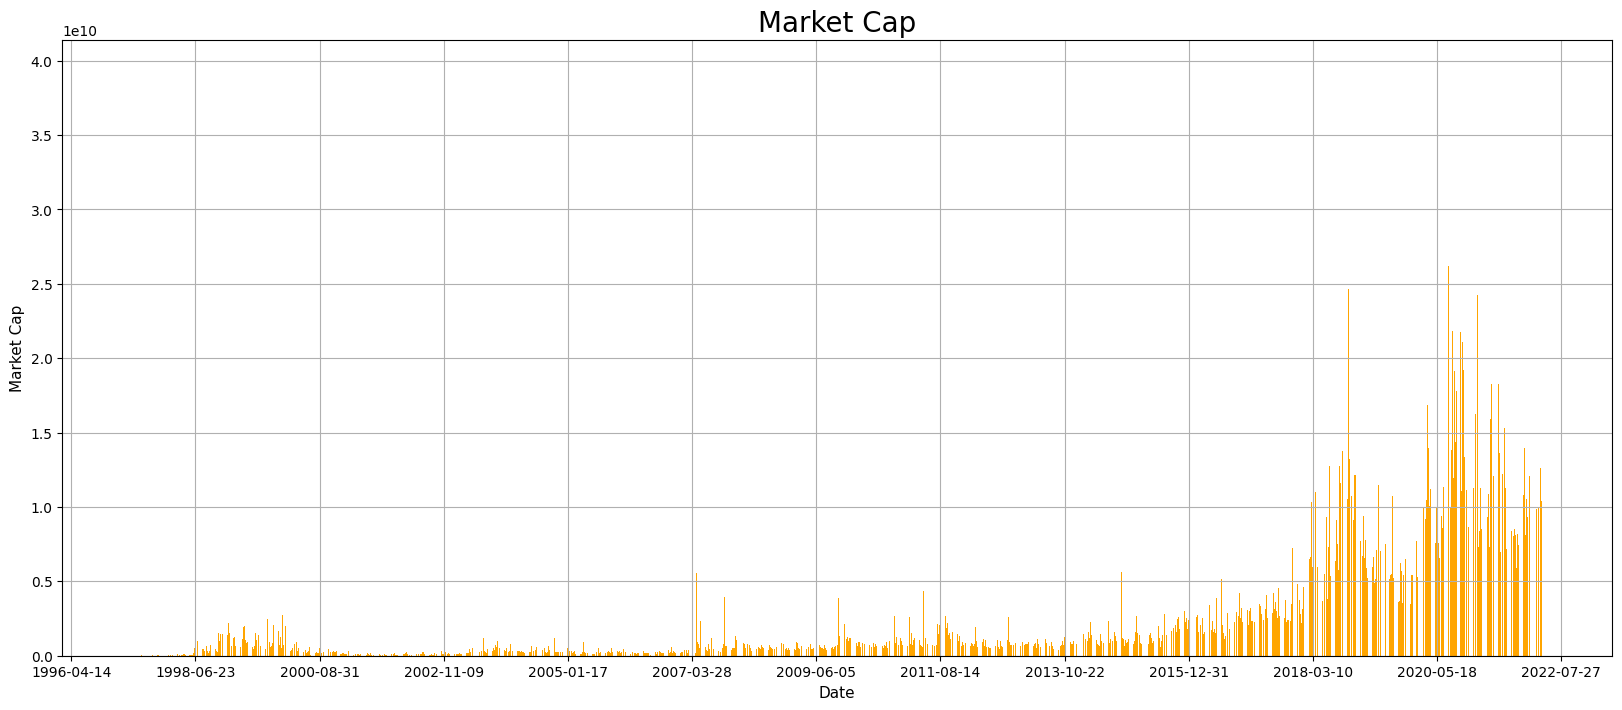

In [26]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(amazon_data['Date'], amazon_data['Market Cap'], color='orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Market Cap', fontsize='11')
plt.title('Market Cap', fontsize=20)
plt.grid()
plt.show()

In [27]:
amazon_data.iloc[amazon_data['Market Cap'].argmax()]

Date          2022-02-04 00:00:00
Open                  3112.129883
High                       3224.0
Low                   3012.159912
Close                 3152.790039
Volume                   12672800
Market Cap     39439399581.282402
Name: 6223, dtype: object

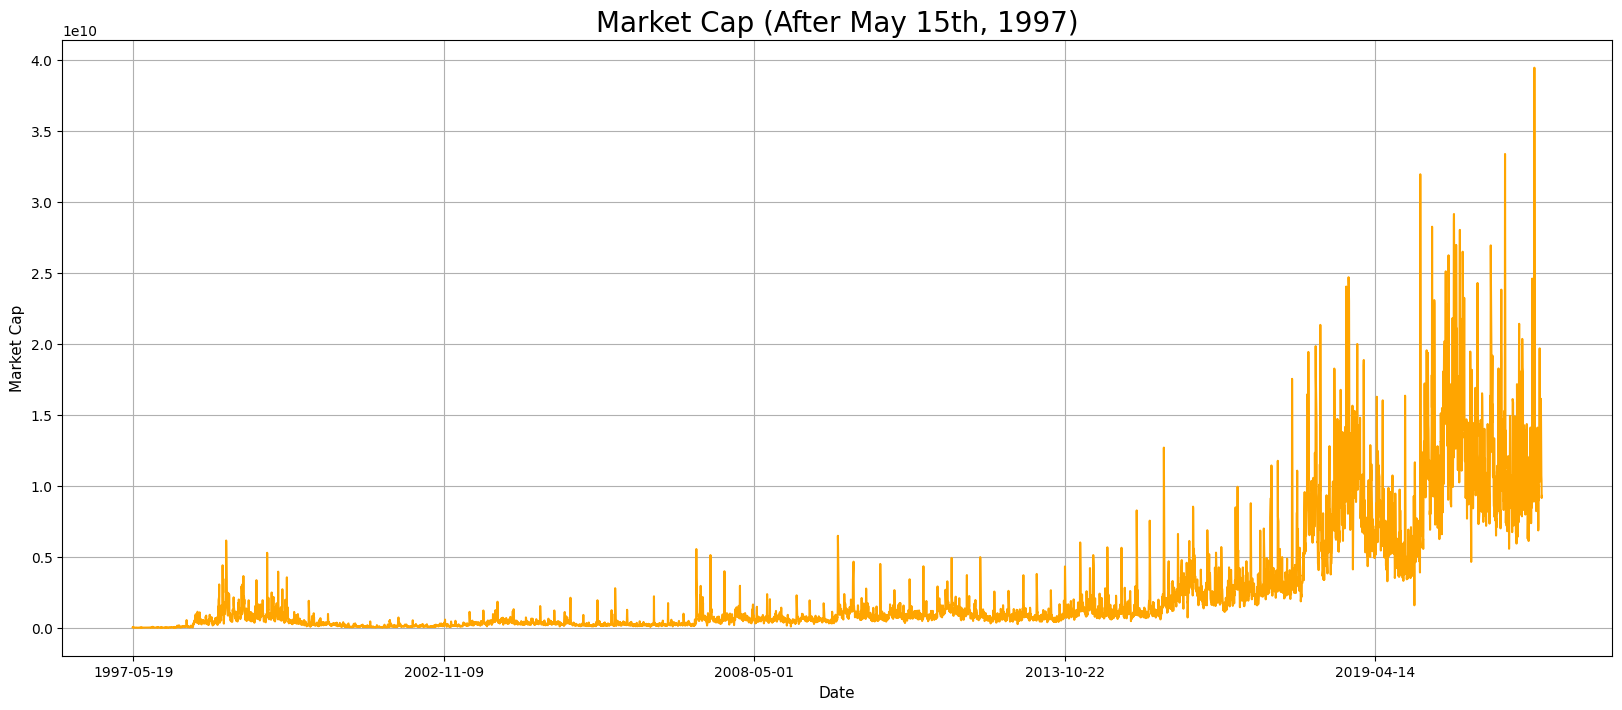

In [28]:
ohlc = amazon_data[amazon_data['Date'] > '1997-05-15']
ohlc = ohlc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume',
                    'Market Cap']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format='%Y-%m-%d')
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(ohlc['Date'], ohlc['Market Cap'], color='orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Market Cap', fontsize='11')
plt.grid()
plt.title('Market Cap (After May 15th, 1997)', fontsize='20')
plt.show()

In [29]:
amazon_data['vol'] = (amazon_data['Close'] / amazon_data['Close'].shift(1)) - 1

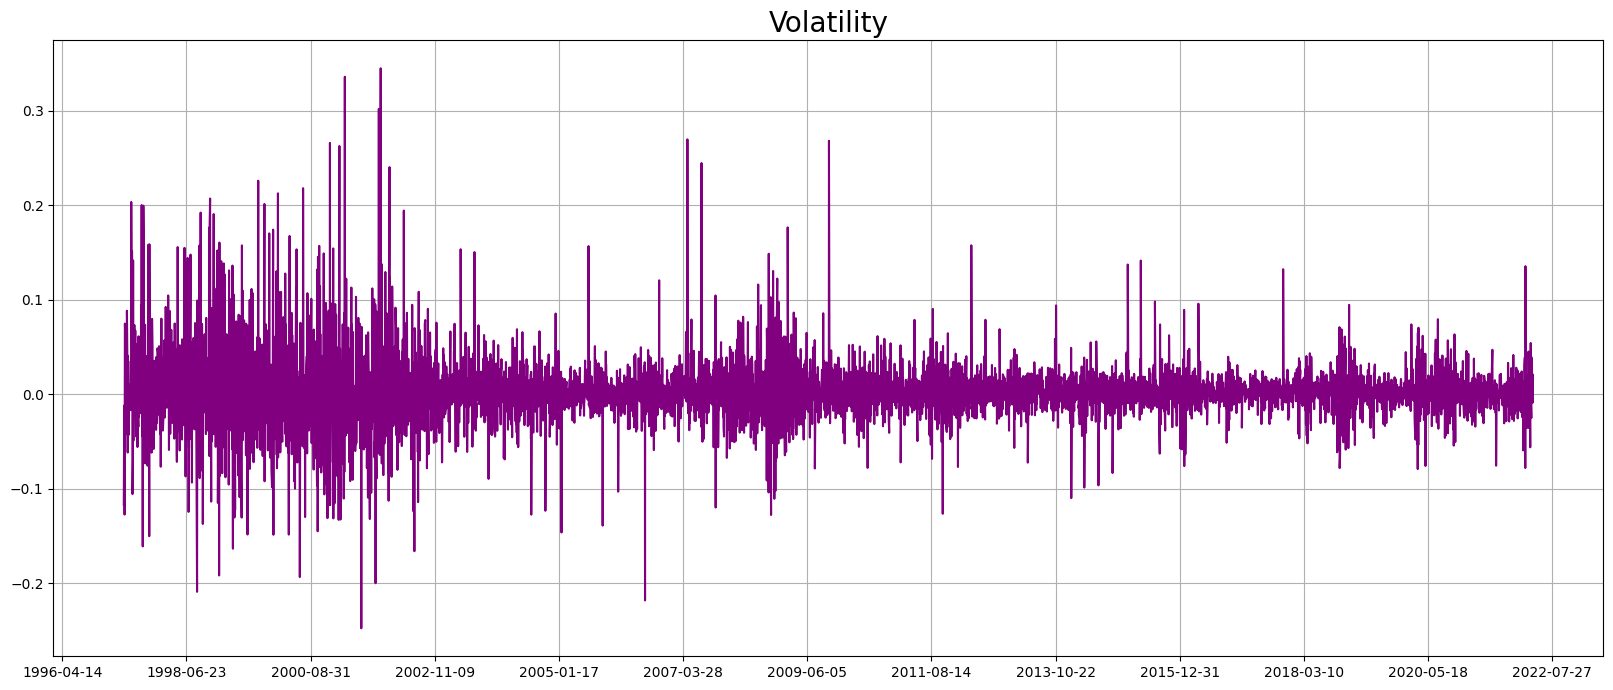

In [30]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(amazon_data['Date'], amazon_data['vol'], color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility', fontsize=20)
plt.grid()
plt.show()

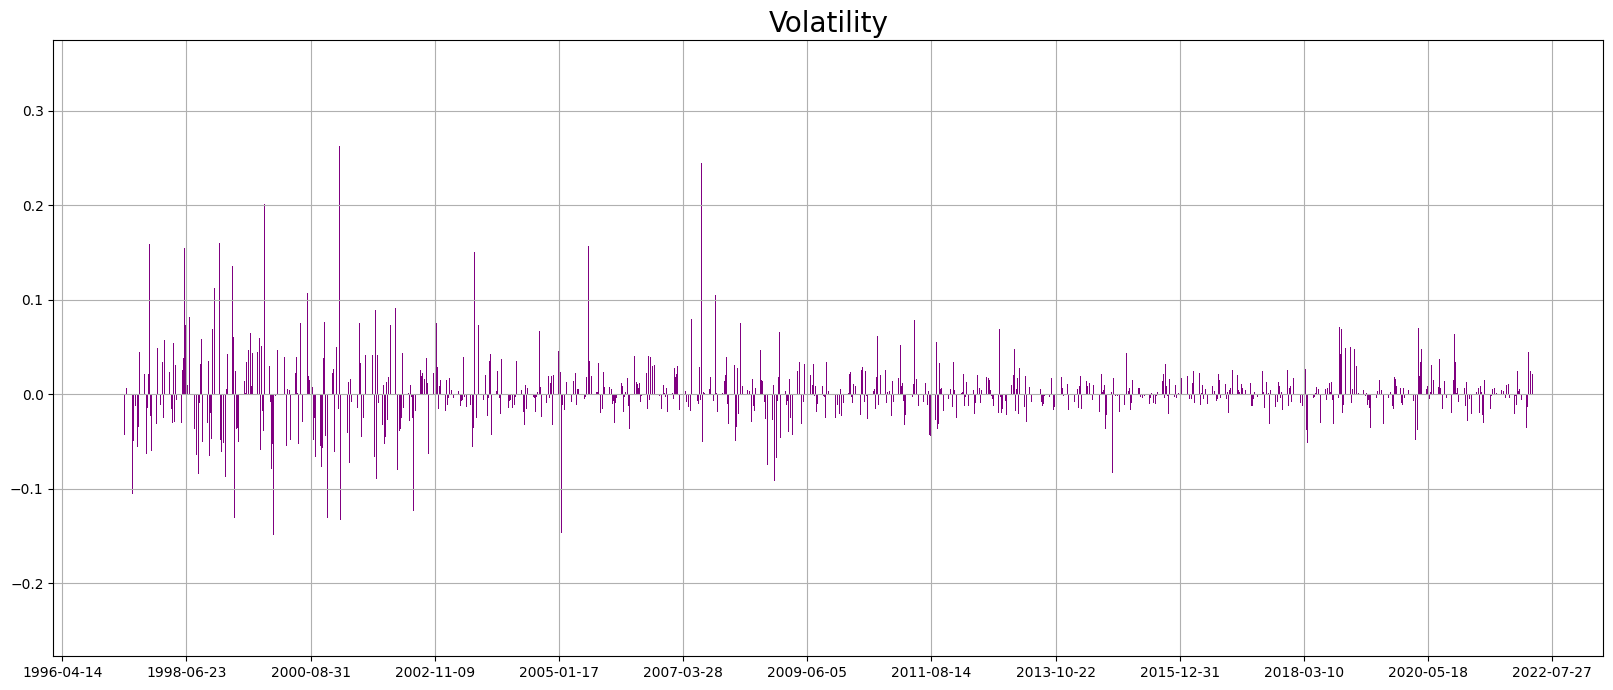

In [31]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(amazon_data['Date'], amazon_data['vol'], color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility', fontsize=20)
plt.grid()
plt.show()

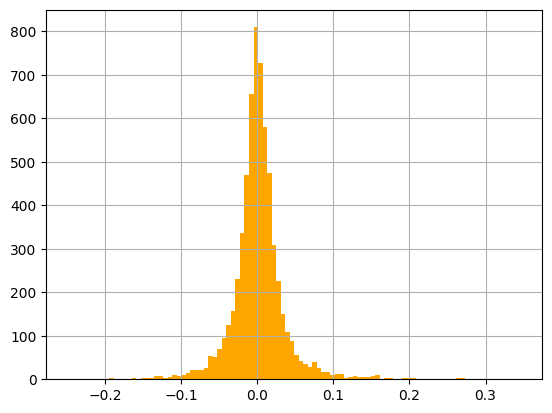

In [32]:
amazon_data['vol'].hist(bins=100, color='orange');

In [33]:
amazon_data['Cumulative Return'] = (1 + amazon_data['vol']).cumprod()

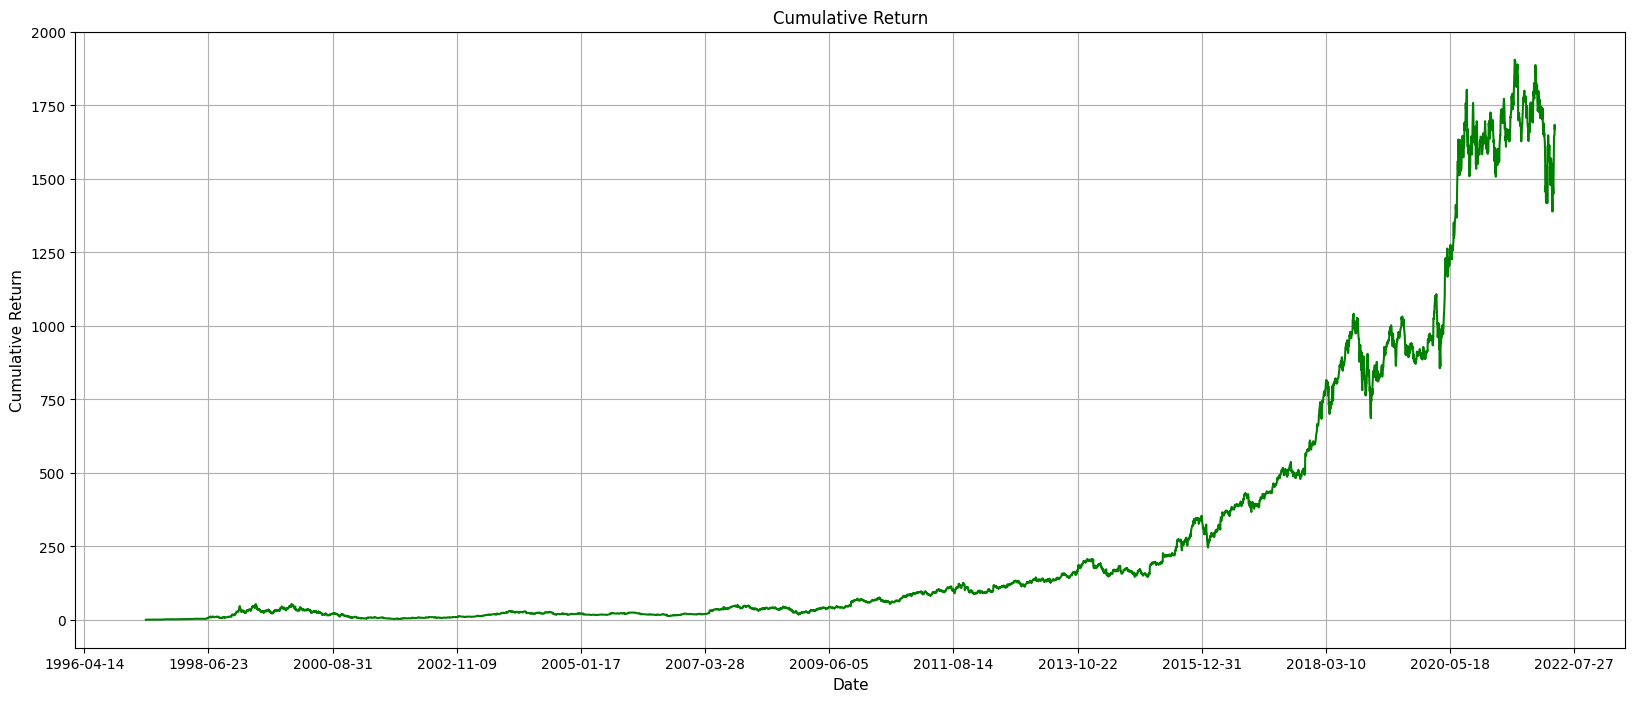

In [34]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(amazon_data['Date'], amazon_data['Cumulative Return'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Cumulative Return', fontsize='11')
plt.title('Cumulative Return')
plt.grid()
plt.show()

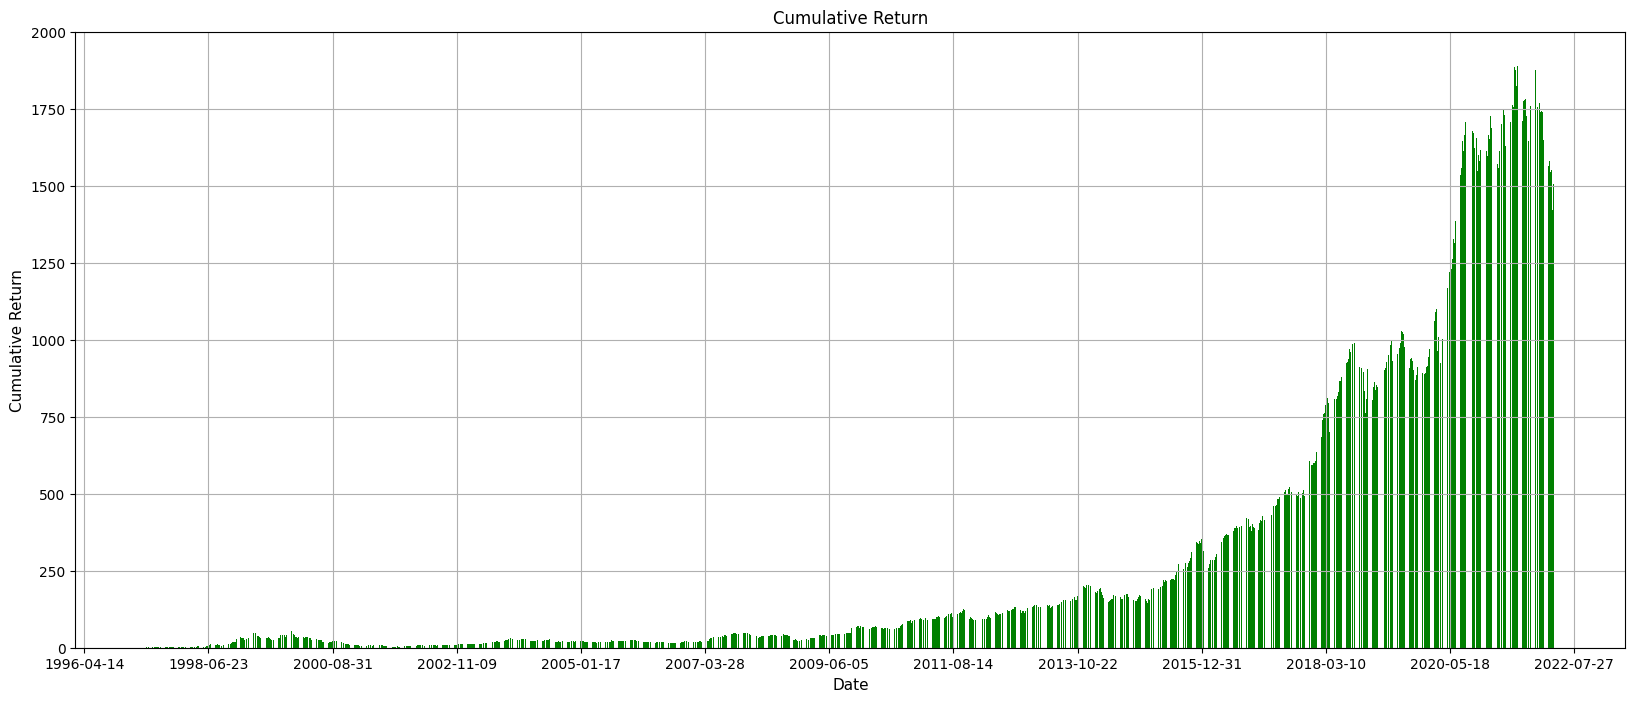

In [35]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(amazon_data['Date'], amazon_data['Cumulative Return'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Cumulative Return', fontsize='11')
plt.title('Cumulative Return')
plt.grid()
plt.show()

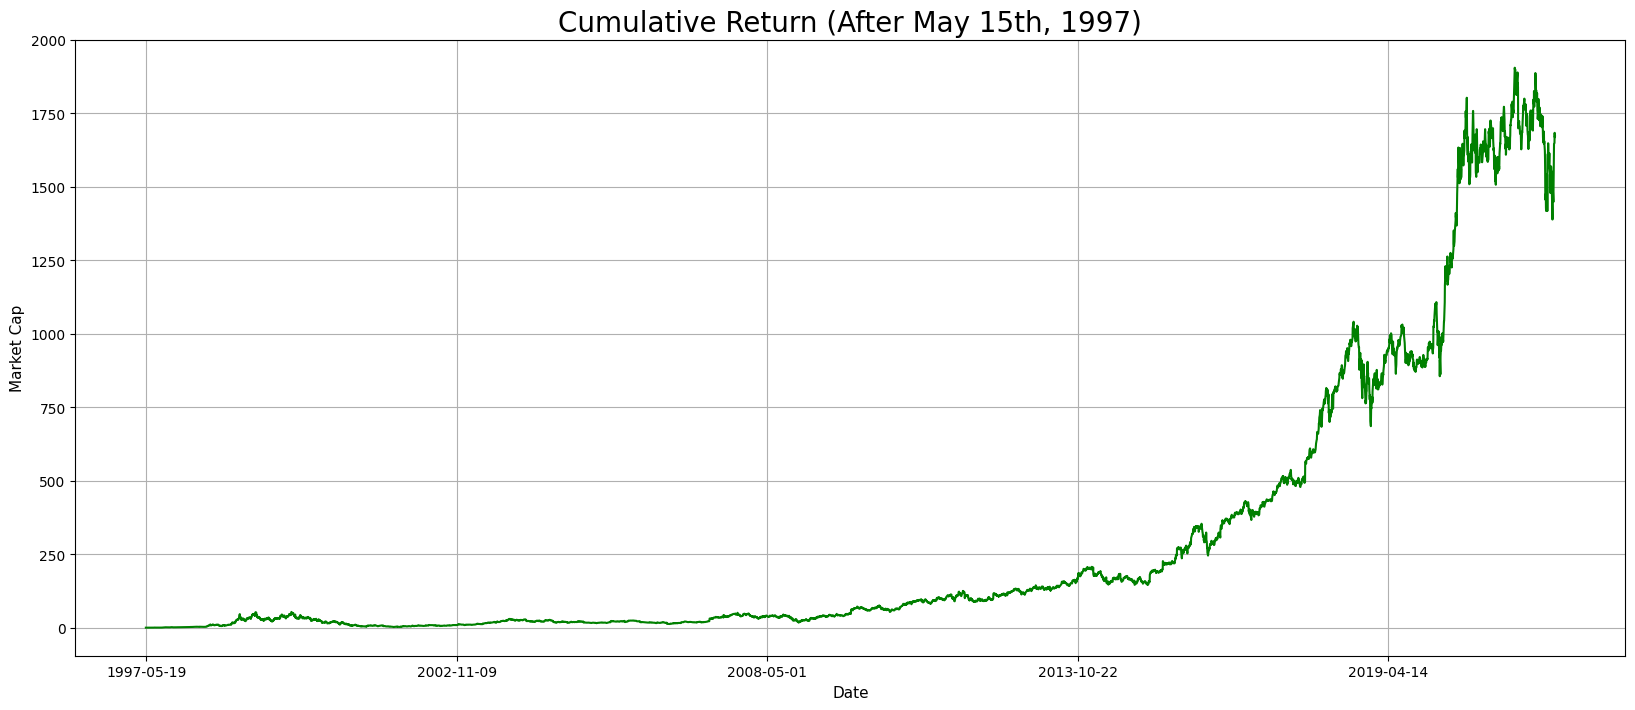

In [36]:
ohlc = amazon_data[amazon_data['Date'] > '1997-05-15']
ohlc = ohlc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume',
                    'Market Cap', 'Cumulative Return']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format='%Y-%m-%d')
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(ohlc['Date'], ohlc['Cumulative Return'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Market Cap', fontsize='11')
plt.grid()
plt.title('Cumulative Return (After May 15th, 1997)', fontsize='20')
plt.show()